In [1]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 1E64-A902

 Directory of C:\Users\Admin\Documents\ironhack\Week_4\Day_2\Afternoon\lab-random-variable-distributions\files_for_lab

29-10-2022  20:08    <DIR>          .
29-10-2022  20:08    <DIR>          ..
25-10-2022  17:13    <DIR>          .ipynb_checkpoints
29-10-2022  20:08            91,686 w4_d2_afternoon.ipynb
25-10-2022  17:09         1,581,918 we_fn_use_c_marketing_customer_value_analysis.csv
               2 File(s)      1,673,604 bytes
               3 Dir(s)  13,194,932,224 bytes free


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
#Get the numerical variables from our dataset.

In [12]:
discrete =  data.select_dtypes(np.number)
#print('the numerical dataframe')
display(discrete)
discrete.dtypes
#Income   
#Monthly Premium Auto
#Months Since Last Claim 
#Months Since Policy Inception
#Number of Open Complaints
#Number of Policies 

continuous = data.select_dtypes(include=['float64'])
#continuous = data.values.tolist()
continuous.dtypes
# output --> Customer Lifetime Value, Total Claim Amount


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Customer Lifetime Value    float64
Total Claim Amount         float64
dtype: object

2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot`

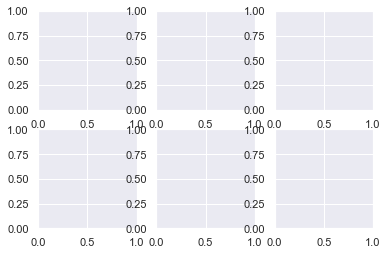

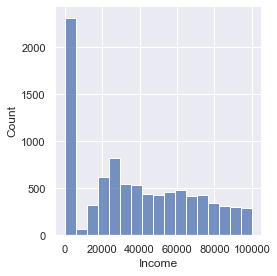

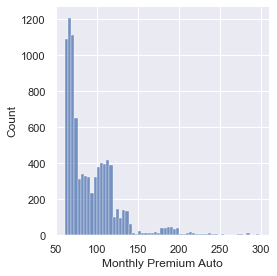

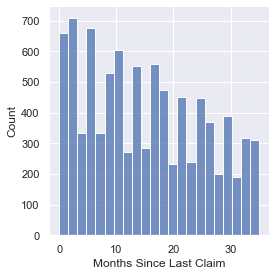

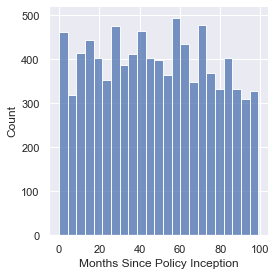

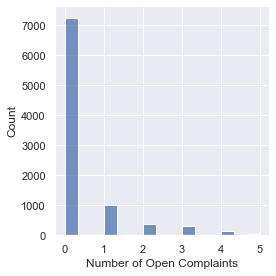

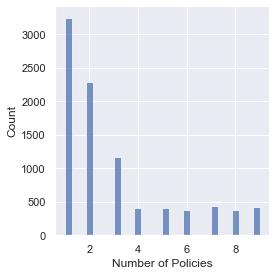

In [7]:
# the folllowing can be interesting though...
#Customer Lifetime Value and Income.
#Total Claim Amount and Vehicle Size.
#barplot of the number of customers per EmploymentStatus and Gender..

sns.set()
fig, axes = plt.subplots(2, 3)

sns.displot(x=data['Income'],height=4, ax = axes[0,0])
sns.displot(x=data['Monthly Premium Auto'],height=4, ax = axes[0,1])
sns.displot(x=data['Months Since Last Claim'],height=4, ax = axes[0,2])
sns.displot(x=data['Months Since Policy Inception'], height=4, ax = axes[1,0])
sns.displot(x=data['Number of Open Complaints'], height=4, ax = axes[1,1])
sns.displot(x=data['Number of Policies'], height=4, ax = axes[1,2])
plt.tight_layout()
plt.show()

#Answers to the Question
# with exception to the plot 'Months since policy Inception'
#the rest are too skewed to be normally distributed
# THey mostly follow exponential distribution

3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [13]:
# to remove/reduce the skewness in the numerical distributions we can also use standard scaler

method 1: Power transformation

# cannot apply Log Transformation because we have negative values

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot`

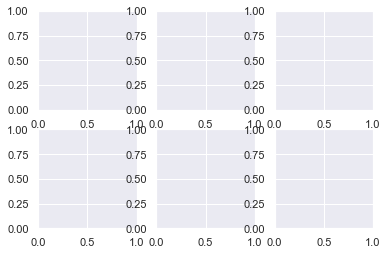

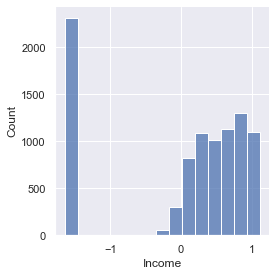

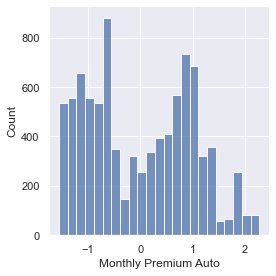

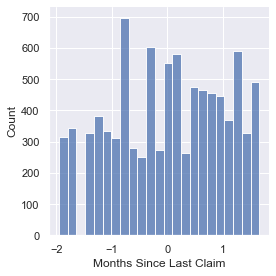

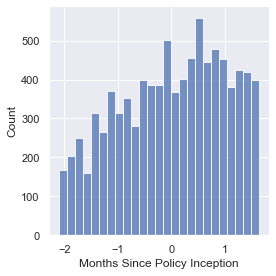

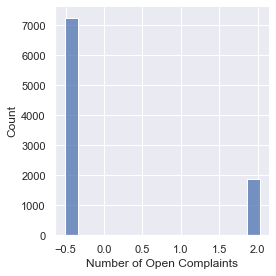

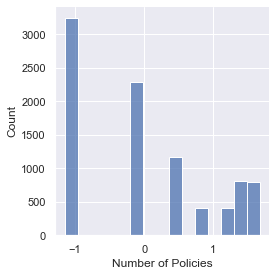

In [21]:
pT = PowerTransformer()
pT.fit(discrete)
discrete_tr = pT.transform(discrete)
discrete_tr_df = pd.DataFrame(discrete_tr, columns=discrete.columns)
#discrete_tr_df

sns.set()
fig, axes = plt.subplots(2, 3)

sns.displot(x=discrete_tr_df['Income'],height=4, ax = axes[0,0])
sns.displot(x=discrete_tr_df['Monthly Premium Auto'],height=4, ax = axes[0,1])
sns.displot(x=discrete_tr_df['Months Since Last Claim'],height=4, ax = axes[0,2])
sns.displot(x=discrete_tr_df['Months Since Policy Inception'], height=4, ax = axes[1,0])
sns.displot(x=discrete_tr_df['Number of Open Complaints'], height=4, ax = axes[1,1])
sns.displot(x=discrete_tr_df['Number of Policies'], height=4, ax = axes[1,2])
plt.tight_layout()
plt.show()

#looks lihe some of them were normalised except: 'Number of Open Complaints', 'Number of policies'

method 2: Scalar transformation

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot`

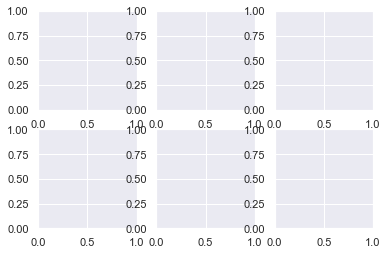

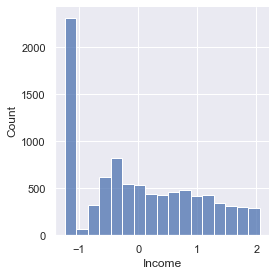

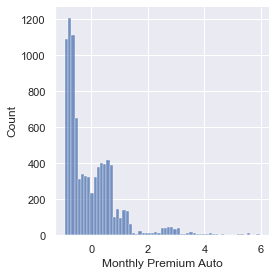

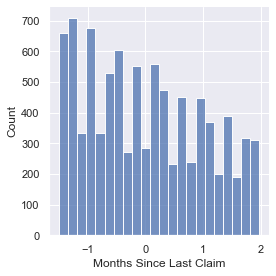

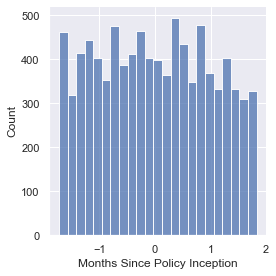

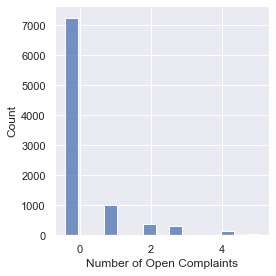

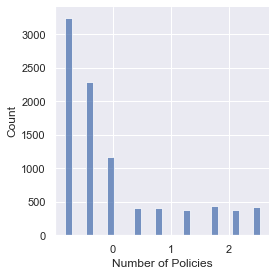

In [25]:
sS = StandardScaler()
sS.fit(discrete)
discrete_tr = sS.transform(discrete)
discrete_ss_df = pd.DataFrame(discrete_tr, columns=discrete.columns)
#discrete_tr_df

sns.set()
fig, axes = plt.subplots(2, 3)

sns.displot(x=discrete_ss_df['Income'],height=4, ax = axes[0,0])
sns.displot(x=discrete_ss_df['Monthly Premium Auto'],height=4, ax = axes[0,1])
sns.displot(x=discrete_ss_df['Months Since Last Claim'],height=4, ax = axes[0,2])
sns.displot(x=discrete_ss_df['Months Since Policy Inception'], height=4, ax = axes[1,0])
sns.displot(x=discrete_ss_df['Number of Open Complaints'], height=4, ax = axes[1,1])
sns.displot(x=discrete_ss_df['Number of Policies'], height=4, ax = axes[1,2])
plt.tight_layout()
plt.show()

#not much change using this method...